#### Vivek Gupta
#### CS 559 Machine Learning
#### Final Project

#### Research Question: How can we classify the level of poverty a county has?

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn import decomposition

In [240]:
df = pd.read_csv("complete_dataset.csv")
df = df.dropna() # Remove rows with null values

In [241]:
df.head()

,Code,POVALL_2018,PCTPOVALL_2018,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2018,NET_MIG_2018,RESIDUAL_2018,GQ_ESTIMATES_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018
2,1001,7587,13.8,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,-7,37,30,0,455,9.339812,2.037449,-0.126214,0.667129,0.540916
3,1003,21069,9.8,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,97,5224,5321,15,2170,10.744094,-0.009294,0.450769,24.276447,24.727215
4,1005,6788,30.9,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,12,-231,-219,0,2813,13.152372,-2.638470,0.479722,-9.234644,-8.754922
5,1007,4400,21.8,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,10,-164,-154,2,2146,11.710488,-1.380324,0.445266,-7.302358,-6.857092
6,1009,7527,13.2,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,5,-9,-4,-3,489,11.907440,-0.155766,0.086537,-0.155766,-0.069229


### Target Distribution

#### Histogram

(array([2.010e+02, 1.058e+03, 1.038e+03, 5.100e+02, 2.150e+02, 6.300e+01,
        2.700e+01, 7.000e+00, 5.000e+00, 1.000e+00]),
 array([ 2.6 ,  7.74, 12.88, 18.02, 23.16, 28.3 , 33.44, 38.58, 43.72,
        48.86, 54.  ]),
 <a list of 10 Patch objects>)

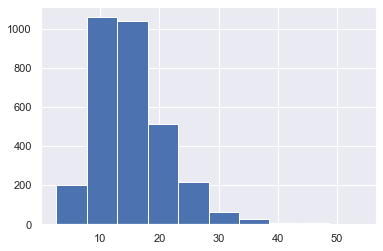

In [242]:
fig, ax = plt.subplots()
ax.hist(df['PCTPOVALL_2018'])

#### Bar Chart

<BarContainer object of 316 artists>

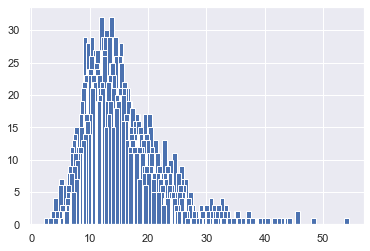

In [243]:
fig, ax = plt.subplots() 
data = df['PCTPOVALL_2018'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 

In [244]:
df['PCTPOVALL_2018'].describe()

count    3125.000000
mean       15.176864
std         6.118351
min         2.600000
25%        10.800000
50%        14.100000
75%        18.300000
max        54.000000
Name: PCTPOVALL_2018, dtype: float64

In [245]:
def classify_labels(x):
    if x < 6:
        return "low"
    elif x < 21:
        return "med"
    else:
        return "high"

df['target'] = df['PCTPOVALL_2018'].apply(classify_labels)

### Columns

In [246]:
# Education columns list
edu_cols = [ 'Percent of adults with less than a high school diploma, 2014-18',
            'Percent of adults with a high school diploma only, 2014-18',
            "Percent of adults completing some college or associate's degree, 2014-18",
            "Percent of adults with a bachelor's degree or higher, 2014-18"]

# Continuum columns list
continuum_cols = ['2003 Rural-urban Continuum Code', '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', 
                  '2013 Urban Influence Code']

# Unemployment columns list
unemp_cols = [ 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018']

# Population columns list
pop_cols = ['R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018']

In [247]:
# Creating a copy
df2 = deepcopy(df)
df2 = df2[edu_cols +  unemp_cols + pop_cols]

### Correlation

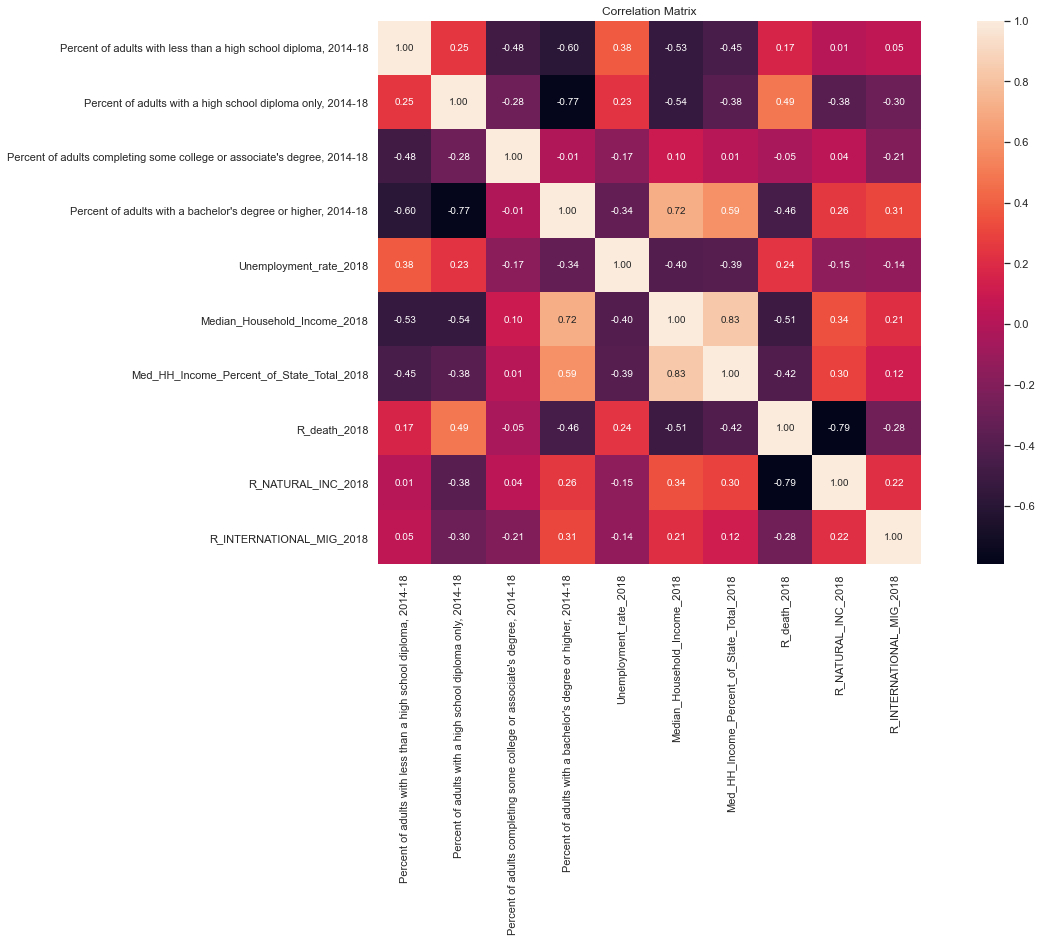

In [248]:
cols= df2.columns
cm = np.corrcoef(df2.values.T)
sns.set(font_scale=1)
plt.figure(figsize = (20,10))

hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols,xticklabels=cols)
hm.set_title('Correlation Matrix')
plt.show()

In [249]:
# Remove correlated features
corr_matrix = df2.corr()

correlated_features = []
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            colname = corr_matrix.columns[i]
            correlated_features.append(colname)
            
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) < -0.75:
            colname = corr_matrix.columns[i]
            correlated_features.append(colname)


print("Correlated Features: ", correlated_features)
df2 = df2.drop(correlated_features, axis=1)
print("\nFeatures: ", list(df2.columns))

Correlated Features:  ["Percent of adults with a bachelor's degree or higher, 2014-18", 'Med_HH_Income_Percent_of_State_Total_2018', 'R_NATURAL_INC_2018']

Features:  ['Percent of adults with less than a high school diploma, 2014-18', 'Percent of adults with a high school diploma only, 2014-18', "Percent of adults completing some college or associate's degree, 2014-18", 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018']


### Prepare data

In [250]:
df2["target"] = df["target"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df = df2
train_y = train_df["target"]
train_x = train_df.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.4, random_state=42)
train_x_scaled = min_max_scaler.fit_transform(X_train)
test_x_scaled = min_max_scaler.transform(X_test)

### Logistic Regression

In [251]:
clf = LogisticRegression(random_state=0, max_iter=200).fit(train_x_scaled, y_train)
pred = clf.predict(train_x_scaled)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_scaled)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.8970666666666667
Test:  0.8864


### SVM

In [252]:
clf = LinearSVC().fit(train_x_scaled, y_train)
pred = clf.predict(train_x_scaled)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_scaled)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.9013333333333333
Test:  0.8976


### LDA

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


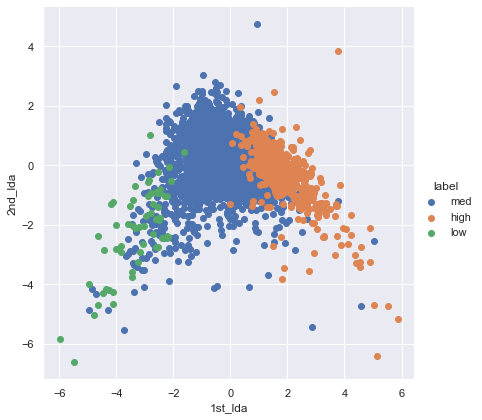

In [253]:
std_scaler = preprocessing.StandardScaler()
temp_df = deepcopy(df2)
temp_y = temp_df["target"]
temp_x = temp_df.drop(["target"], axis=1)
temp_x = min_max_scaler2.fit_transform(temp_x)

lda = LDA()
lda_data_vis = lda.fit_transform(temp_x, temp_y)

lda_data_vis = np.vstack((lda_data_vis.T,temp_y)).T
lda_vis_df = pd.DataFrame(data=lda_data_vis,columns=("1st_lda","2nd_lda","label"))  
sns.FacetGrid(lda_vis_df,hue="label",size=6).map(plt.scatter,'1st_lda','2nd_lda').add_legend()
plt.show()

### LDA + Logistic Regression

In [254]:
lda = LDA()
train_x_lda = lda.fit_transform(train_x_scaled, y_train)
test_x_lda = lda.transform(test_x_scaled)

clf = LogisticRegression(random_state=0).fit(train_x_lda, y_train)
pred = clf.predict(train_x_lda)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_lda)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.9194666666666667
Test:  0.9176


### LDA + SVM

In [255]:
clf = LinearSVC(max_iter=2500).fit(train_x_lda, y_train)
pred = clf.predict(train_x_lda)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_lda)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.912
Test:  0.9032


### PCA

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


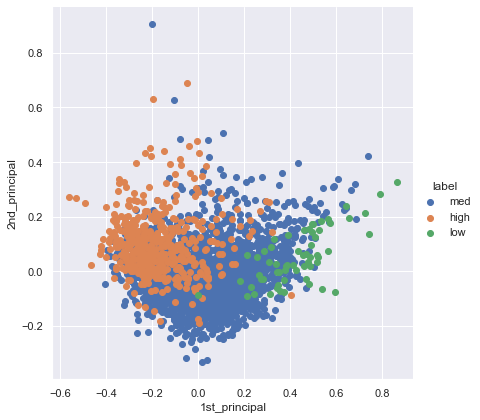

In [256]:
pca = decomposition.PCA(n_components=2) 
pca_data_vis=pca.fit_transform(temp_x) 

pca_data_vis = np.vstack((pca_data_vis.T,temp_y)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

### PCA + Logistic Regression

In [257]:
train_x_pca = pca.fit_transform(train_x_scaled)
test_x_pca = pca.transform(test_x_scaled)

clf = LogisticRegression(random_state=0).fit(train_x_pca, y_train)
pred = clf.predict(train_x_pca)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_pca)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.8645333333333334
Test:  0.8496


### PCA + SVM

In [258]:
clf =  LinearSVC(max_iter=2500).fit(train_x_pca, y_train)
pred = clf.predict(train_x_pca)
print("Train: ", metrics.accuracy_score(y_train, pred))
pred = clf.predict(test_x_pca)
print("Test: ", metrics.accuracy_score(y_test, pred))

Train:  0.8586666666666667
Test:  0.8464
